## Single-cell transcriptomics

Provided you completed the [3k PBMCs tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html) of scanpy, we illustrate the depiction of marker gene information upon the KEGG pathway in this example.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = (6, 6)

In [2]:
adata = sc.read_10x_mtx(
    '../filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols')    

In [3]:
adata.var_names_make_unique() 

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [6]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [8]:
sc.pp.log1p(adata)

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [10]:
adata = adata[:, adata.var.highly_variable]

In [11]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [12]:
sc.pp.scale(adata, max_value=10)

In [13]:
sc.tl.pca(adata, svd_solver='arpack')

In [14]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [15]:
sc.tl.leiden(adata)

In [16]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [17]:
## Consider top-50 markers 
markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(50)
markers

,0,1,2,3,4,5,6,7
0,LTB,CST3,HLA-DPB1,CCL5,FCER1G,NKG7,HLA-DPA1,PF4
1,IL32,TYROBP,CD79A,NKG7,AIF1,CTSW,HLA-DPB1,PPBP
2,CD2,S100A8,HLA-DRB1,IL32,LST1,GZMB,HLA-DRB1,SDPR
3,MAL,FCN1,HLA-DPA1,CST7,TYROBP,GNLY,HLA-DMA,GNG11
4,AQP3,LGALS1,CD79B,GZMA,CST3,PRF1,HLA-DQA1,NRGN
5,HINT1,S100A6,HLA-DQA1,CTSW,SAT1,CST7,HLA-DQB1,SPARC
6,GIMAP7,LGALS2,MS4A1,GZMK,COTL1,GZMA,CST3,CCL5
7,GIMAP5,AIF1,HLA-DQB1,PTPRCAP,IFITM3,FGFBP2,FCER1A,RGS18
8,LDLRAP1,GPX1,CD37,LYAR,CTSS,FCGR3A,TACR2,GPX1
9,TRABD2A,LST1,TCL1A,KLRG1,LGALS1,SRGN,FSTL1,TPM4


In [18]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

In [19]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
# adata.rename_categories('leiden', new_cluster_names)
adata.obs["leiden"] = adata.obs["leiden"].cat.rename_categories(new_cluster_names)

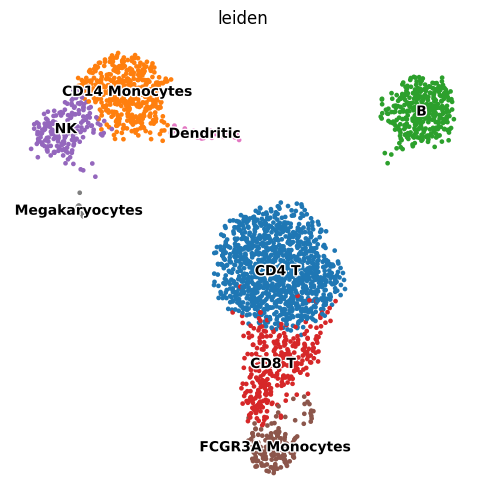

In [20]:
sc.pl.umap(adata, color='leiden', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

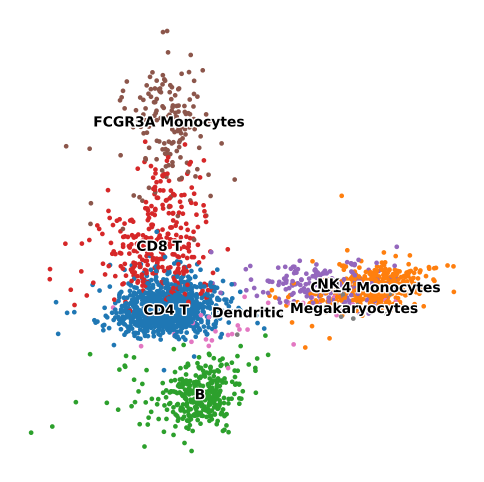

In [21]:
sc.pl.pca(adata, color='leiden', legend_loc='on data', title='', frameon=False, legend_fontoutline=2)

In [22]:
import pykegg
from matplotlib import colors as mcolors
from PIL import Image
cols = mcolors.TABLEAU_COLORS

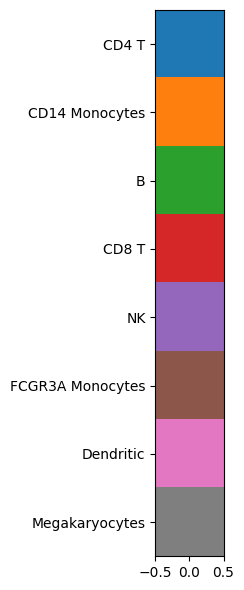

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
fig, ax = plt.subplots(1,1)
ax.imshow(to_rgba_array([cols[i] for i in cols.keys()]).reshape(10,1,4)[0:8,:,:])
ax.set_yticks(np.arange(8))
ax.set_yticklabels(new_cluster_names)
plt.tight_layout()

In [24]:
import requests_cache

## Cache all the downloaded files
requests_cache.install_cache('pykegg_cache')

In [25]:
g = pykegg.KGML_graph(pid="hsa04380")

In [26]:
nds = g.get_nodes()
for mark in [0,1,2,3,4,5,6,7]:
    nds["in"] = nds["graphics_name"].apply(lambda x: 
                                           len(set(markers[str(mark)]) & 
                                               set([i.replace(" ","").replace("...","") for i in x.split(",")])))
    nds["color"+str(mark)] = [cols[list(cols.keys())[mark]] if i else None for i in nds["in"].tolist()]

In [27]:
qc = list()
for id in nds.id:
    tmp = nds[nds.id==id].loc[:,[i for i in nds.columns if i.startswith("color")]]
    tmpl = tmp.iloc[0,:].tolist()
    if len(set(tmpl))==1 and tmpl[0]==None:
        qc.append("#ffffff")
    else:
        qc.append([i for i in tmpl if i is not None])
nds["color"]=qc

In [28]:
kegg_map = pykegg.overlay_opencv_image(nds, pid="hsa04380")

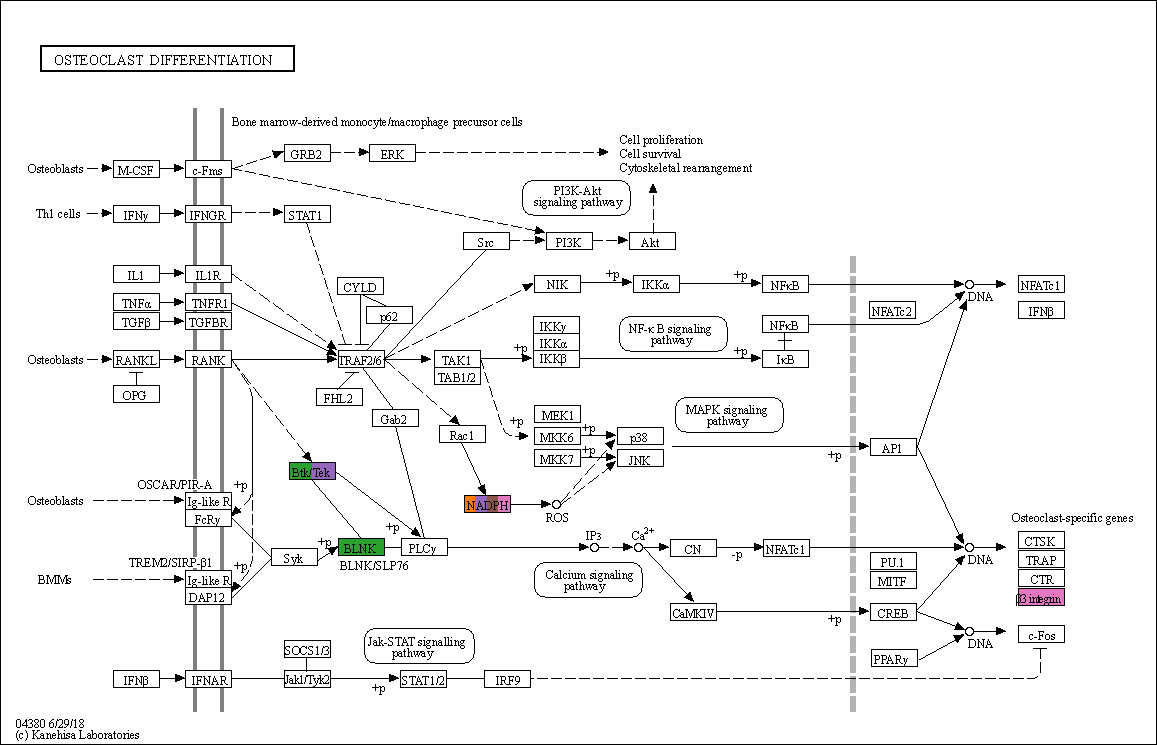

In [29]:
Image.fromarray(kegg_map)

### Associate statistical values with the nodes


In [68]:
## Extract adjusted p-values from the scanpy object
## This time, cluster 4 identified by leiden algorithm
pval_adj = pd.concat([
    pd.DataFrame(adata.uns['rank_genes_groups']['names'])["4"],
    pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])["4"],
], axis=1)
## Make dict
pval_adj.index = pval_adj.iloc[:,0]
pval_adj_dic = pval_adj.iloc[:,1].apply(lambda x: np.log10(x)).to_dict()

In [75]:
## Append new color column based on dict
nds = pykegg.append_colors_continuous_values(nds,
                                       pval_adj_dic,
                                       new_color_column="pval_adj_4",
                                       two_slope=False,
                                        colors=["cyan","red"])

In [78]:
img_arr = pykegg.overlay_opencv_image(nds, pid="hsa04380", fill_color="pval_adj_4")

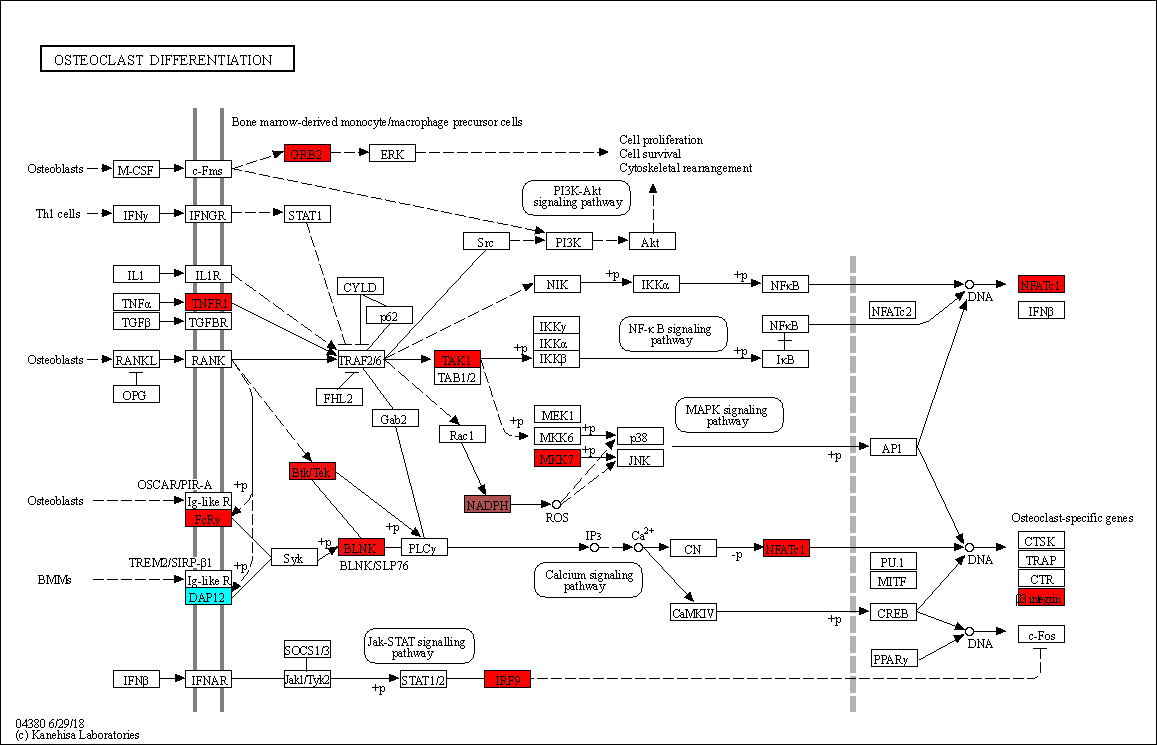

In [79]:
## Visualize
Image.fromarray(img_arr)

### Legends

The legend can be added through the `append_legend` function. Same specifications as when specifying colors are required for the min_value, max_value, and center_value. The position can be selected from four options: "topright," "topleft," "bottomright," and "bottomleft."

In [62]:
max([pval_adj_dic[i] for i in pval_adj_dic.keys()])

-0.0006253720313310442

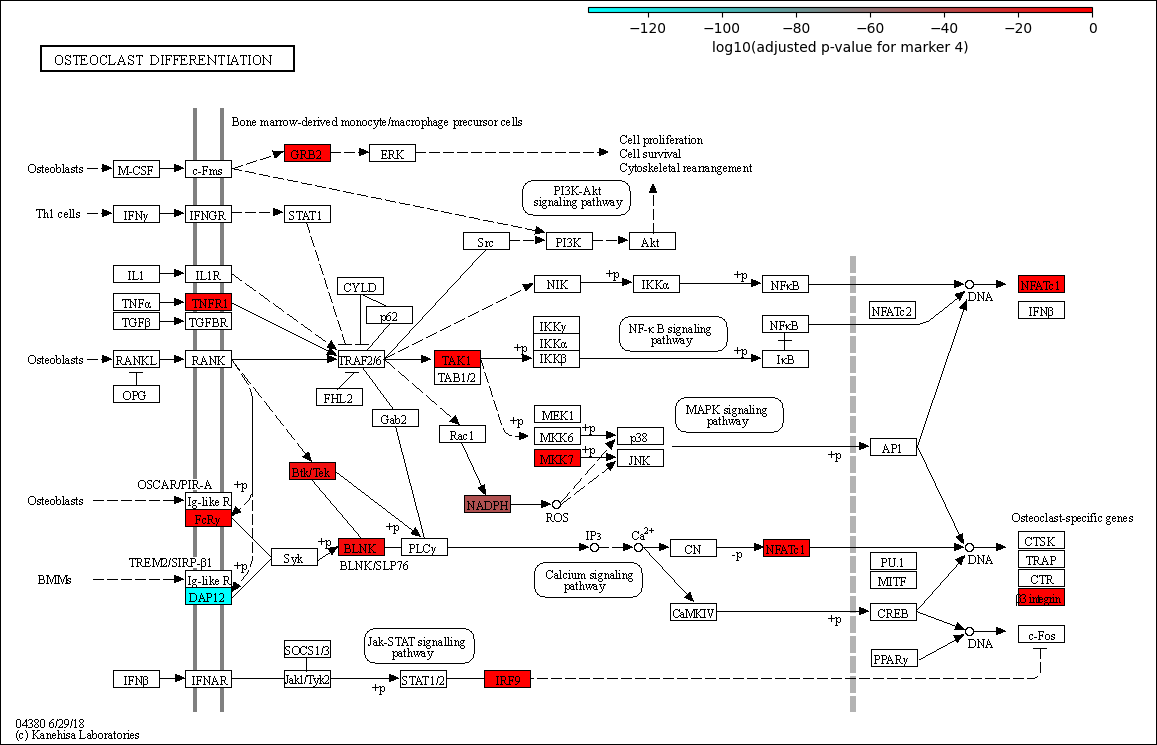

In [80]:
Image.fromarray(pykegg.append_legend(img_arr,
                                     min_value=min([pval_adj_dic[i] for i in pval_adj_dic.keys()]),
                                    max_value=0, two_slope=False, colors=["cyan","red"],
                                    width=6.5, label="log10(adjusted p-value for marker 4)"))